## <font color="orange">**Step 2: Data Understanding**</font>
it icludes these steps:
- #### 2.1 Data Collection
- #### 2.2 Data Description
- #### 2.3 Data Exploration
- #### 2.4 Data Quality Verification
---

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler


### <font color="green">**2.1 Data Collection**</font>

In this step, we load the provided Palmer Penguins dataset to verify that it was correctly imported and briefly inspect its structure.

- **Dataset source**: Palmer Penguins(A. M. Horst, A. P. Hill, and K. B. Gorman, palmerpenguins: Palmer Archipelago (Antarctica) penguin data, 2020. [Online]. Available: https://allisonhorst.github.io/palmerpenguins/. DOI: 10.5281/zenodo.3960218)

#### **Why is this important?**
- We need to verify that the dataset is successfully loaded and contains the expected structure.
- Viewing the first few rows helps us understand the features and ensure there are no formatting issues.

In [10]:
# Load the dataset
df = pd.read_csv("../data/raw/penguins_dataset_w_target.csv")

# Display the first 5 rows to understand the data structure
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **Observations**

The dataset has been successfully loaded, containing 7 features:

- **Categorical:** species, island, sex (species type, observation location, gender).
- **Numerical:** bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g (biometric measurements).

Some rows contain missing values, requiring handling in data preparation.

---

### <font color="green">**2.2 Data Description**</font>

Now, we are going to analyze the dataset structure to understand what features we have and how they are distributed. This step helps us prepare for preprocessing and feature selection, directly supporting RQ1 (Can we classify species using these features?) and RQ2 (Which features are important for classification?).

#### **Why is this important?**
- **Understanding Data Structure**: Helps identify column names, data types, and the presence of missing values.
- **Numerical Feature Summary**: df.describe() provides metrics such as mean, standard deviation, and range for numerical columns, helping identify central tendencies and outliers.
- **Detecting Data Issues**: Checked via df.info(), ensuring all columns have appropriate data types and no critical data is missing.
- **Checking Dataset Size**: df.shape helps Knowing the number of rows and columns helps in planning preprocessing and computational efficiency.
- **Identifying Unique Values in Categorical Columns**: Ensures data consistency and helps in feature selection.

In [11]:
# Show dataset info (column names and numbers, data types, missing values)
df.info()

# Descriptive statistics for numerical columns
df.describe()

# The shape of the data (number of rows and columns)
print(f"Shape of dataset: {df.shape}")

# Check unique values in categorical columns
print("Unique values in species column:", df["species"].unique())
print("Unique values in island column:", df["island"].unique())
print("Unique values in sex column:", df["sex"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Shape of dataset: (344, 7)
Unique values in species column: ['Adelie' 'Chinstrap' 'Gentoo']
Unique values in island column: ['Torgersen' 'Biscoe' 'Dream']
Unique values in sex column: ['Male' 'Female' nan]


### **Observations**

#### **Dataset Overview**  
- **Shape**: The dataset contains 344 rows and 7 columns.  
- **Feature Types**: Categorical and Numerical

#### **Completeness and Integrity**
- **Missing Data**: Minor issues with missing data:
  - bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g: Each has 2 missing entries.
  - sex: Has 11 missing entries, indicating potential data collection challenges or entry errors.
- **No missing data** in species and island columns, ensuring reliable species classification and location data.

#### **Unique Values**
- **Species Diversity**: Consists of three penguin species - Adelie, Chinstrap, and Gentoo, indicating a diverse study.
- **Habitat Distribution**: Penguins are observed across three islands - Torgersen, Biscoe, and Dream- which could influence ecological studies.
- **Gender Observation**: Notable presence of both male and female penguins, with some entries missing this detail.
 
I realized that the dataset is well-structured but contains missing values that must be handled in the Data Preparation phase.
Categorical data (species, island, sex) are stored as object data type, which will require encoding

---


### <font color="green">**2.3 Data Exploration**</font>

This section delves deeper into the dataset to visualize and understand the distributions and relationships between different features. By exploring these aspects, we can identify important characteristics for modeling, such as Class imbalance, Feature distribution and skewness, and Potential outliers.


### **2.3.1 Bar Chart**

#### **Why Use a Bar Chart?**
A bar chart is particularly effective for visualizing categorical data because it clearly displays the count of categories, which helps in quickly assessing the distribution and potential imbalances in the dataset that might affect the model's performance.

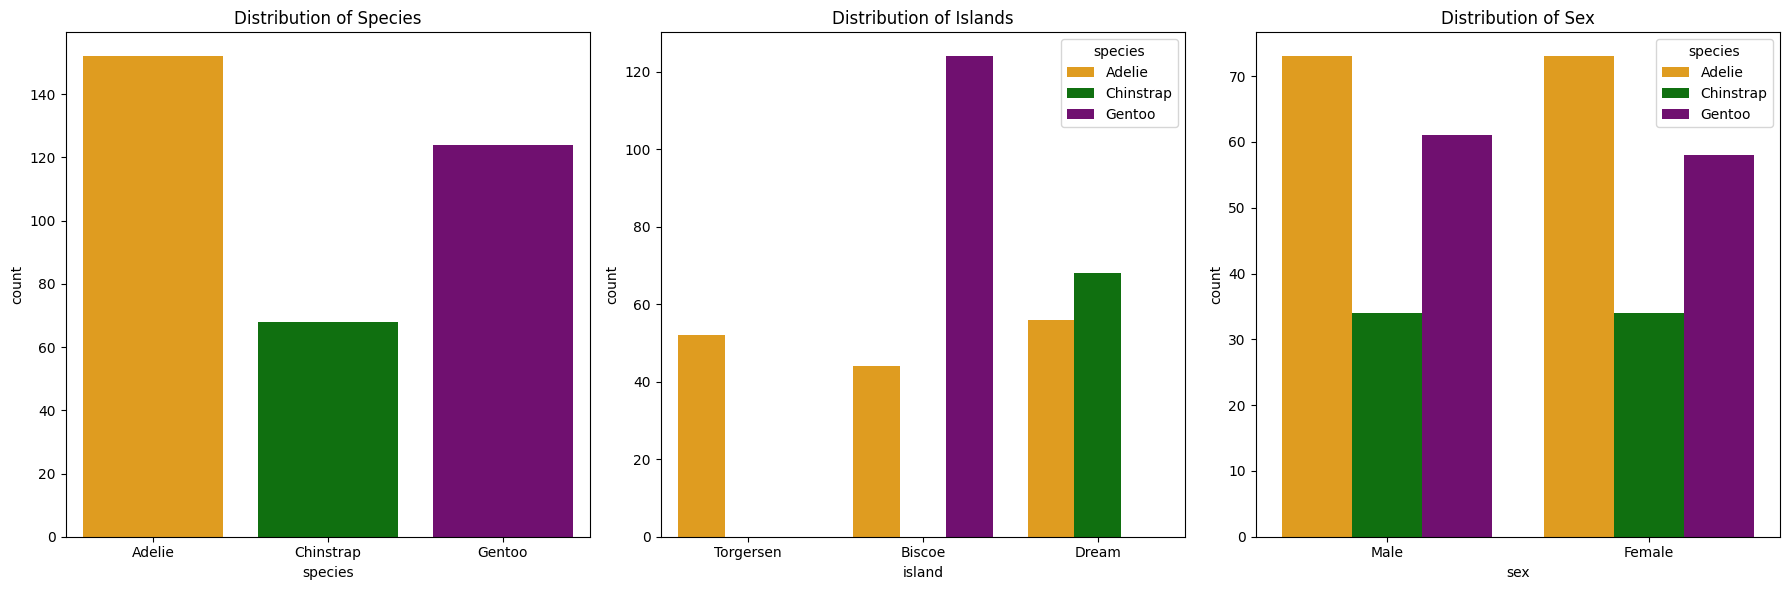

In [4]:
# Countplot for categorical features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.countplot(data=df, x='species', hue="species", palette=['orange', 'green', 'purple'], ax=axes[0])
axes[0].set_title('Distribution of Species')

sns.countplot(data=df, x='island', hue="species", palette=['orange', 'green', 'purple'], ax=axes[1])
axes[1].set_title('Distribution of Islands')

sns.countplot(data=df, x='sex', hue="species", palette=['orange', 'green', 'purple'], ax=axes[2])
axes[2].set_title('Distribution of Sex')

plt.tight_layout()
plt.show()

### **Observations**
#### **Distribution of Species:**
- **Adelie penguins**: Represented by the color orange, this species has the highest count, significantly outnumbering the others.
- **Gentoo penguins**: Shown in green, this species has a moderate presence.
- **Chinstrap penguins**: The purple bar represents the least numerous species in the dataset.

The dataset has more Adelie penguins than Chinstrap.
This suggests we may need to check for class imbalance before training the model

#### **Distribution of Islands:**
- **Gentoo penguins** are only found on Biscoe Island, making "island" a strong predictor for this species.  
- **Chinstrap penguins** are only found on Dream Island, further supporting its usefulness.  
- **Adelie penguins** are found on all three islands, meaning 'island' alone may not fully differentiate them.
Since certain species are found only on specific islands, the "island" feature is useful for classification. To use it in our model, we will apply One-Hot Encoding in the Data Preparation step <font color="orange">**Step 2: Data Understanding**</font>

#### **Distribution of Sex:**
- **Adelie penguins** show a balanced distribution between males and females.
- **Gentoo penguins** also exhibit a relatively balanced distribution, with slightly more females than males.
- **Chinstrap penguins** have a noticeable skew towards males, with fewer females represented in the dataset.
- **Result** -> Since the sex distribution is fairly balanced across all species, this feature is not likely to introduce a strong bias in classification models.

---

### **2.3.2 Histograms**

#### **Why use histogram?**
Histograms are used to visualize the distribution of numerical features in our dataset. This helps in understanding:
- The spread and distribution of each feature.
- The presence of outliers, skewness, and multiple peaks.
- Whether data transformations (such as normalization or scaling) might be necessary before modeling.

#### **Why bins=20?**
The bins parameter controls how the range of values is divided into intervals (bins). 
  - A higher number of bins (e.g., 50+) might make the distribution too fragmented, making it harder to interpret.
  - A lower number of bins (e.g., 5-10) might oversimplify the distribution, hiding meaningful patterns.
  - 20 bins ensure a balanced level of detail, revealing key trends without excessive fragmentation.


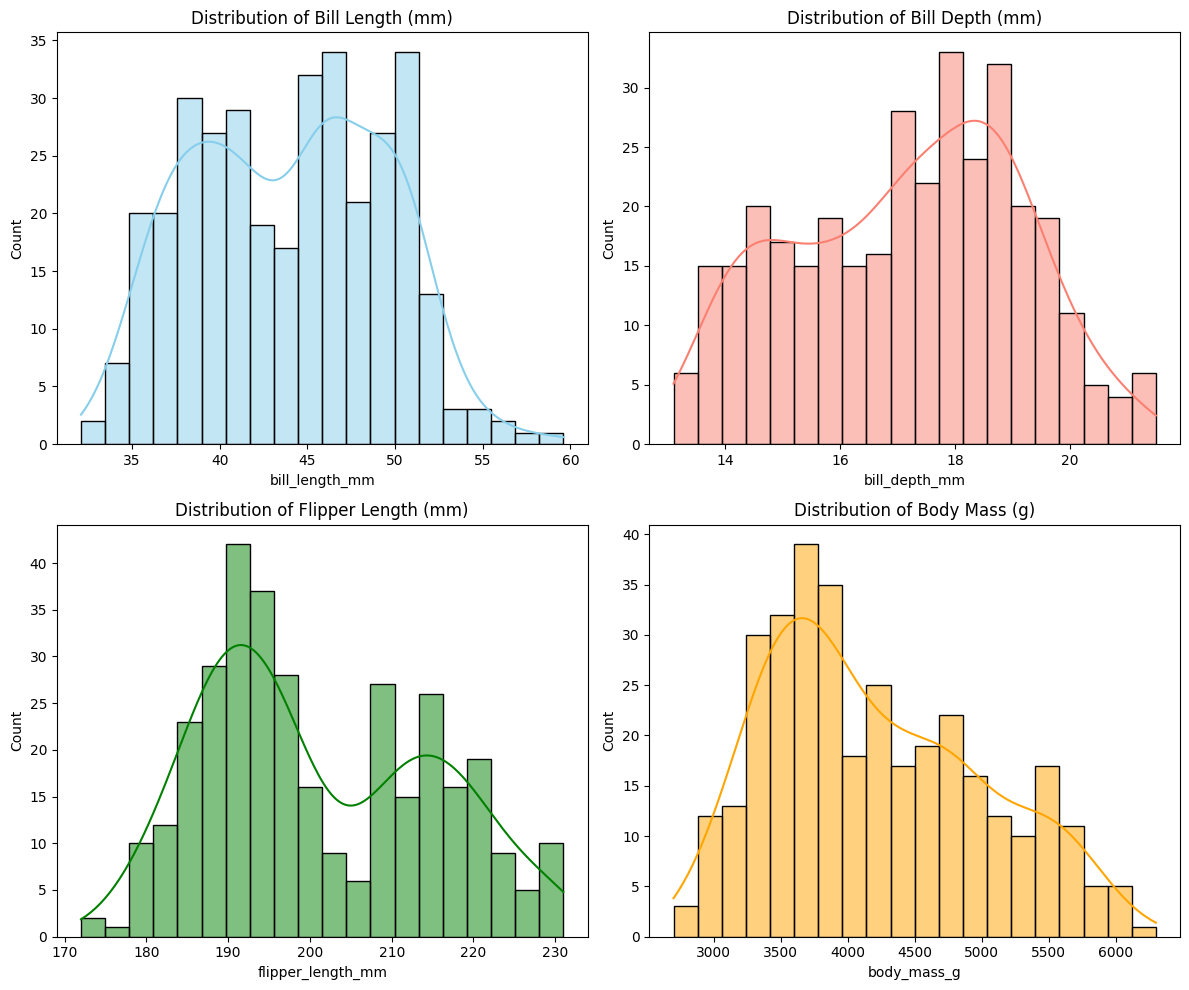

In [5]:
# Set up figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histograms of numerical features
sns.histplot(data=df, x="bill_length_mm", bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Bill Length (mm)')

sns.histplot(data=df, x="bill_depth_mm", bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Bill Depth (mm)')

sns.histplot(data=df, x="flipper_length_mm", bins=20, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Flipper Length (mm)')

sns.histplot(data=df, x="body_mass_g", bins=20, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Body Mass (g)')

plt.tight_layout()
plt.show()


### **Observations**
### Bill Length Distribution
This histogram visualizes the distribution of penguin bill lengths in millimeters, highlighting variations among species.

- The x-axis represents bill length (mm).
- The y-axis represents the number of penguins within each bill length range.
- Most penguins have bill lengths between 40 mm and 50 mm, as shown by the tallest bars.
- The multiple peaks suggest that different species exhibit distinct bill length patterns.
- Few penguins have very short ~32 mm or very long ~58 mm bill lengths, indicated by the smaller bars at the edges.
- The distribution is multimodal, meaning there are several peaks, likely corresponding to different penguin species.     

### Bill Depth Distribution
This histogram visualizes the distribution of penguin bill depth in millimeters.

- The x-axis represents bill depth (mm).
- The y-axis represents the number of penguins within each bill depth range.
- Most penguins have bill depths between 16 mm and 19 mm, as indicated by the highest bars.
- The multiple peaks suggest that different species exhibit distinct bill depth patterns, reinforcing its usefulness for classification.
- A slight right-skew (longer tail on the right) indicates that a few penguins have exceptionally deep bills, possibly outliers.

### Flipper Length Distribution
This histogram visualizes the distribution of penguin flipper lengths in millimeters.

- The x-axis represents flipper length (mm).
- The y-axis represents the number of penguins within each flipper length range.
- The distribution shows two major peaks, suggesting distinct groups corresponding to different species.
- Most penguins have flipper lengths between 180 mm and 220 mm.
- The presence of two well-separated peaks indicates that flipper length is a strong differentiating feature among species.
- A few extreme values at the shorter and longer ends may be outliers or rare cases.
- Since flipper length appears to strongly correlate with species type, it will likely be an essential predictor in classification.

### Body Mass Distribution
This histogram visualizes the distribution of penguin body mass in grams.

- The x-axis represents body mass (g).
- The y-axis represents the number of penguins within each weight range.
- The data is right-skewed, meaning most penguins weigh between 3000g and 5000g, but some exceed 6000g.
- Multiple peaks suggest species-based differences in body mass.
- Some values in the higher weight range could be outliers or belong to larger species.
                                              
#### Feature Differentiation
- Bill Length: The multiple peaks indicate that bill length varies significantly across species, making it a strong distinguishing feature for classification.
- Bill Depth: The slightly skewed distribution suggests species-specific differences, reinforcing its importance in classification.
- Flipper Length: The two well-separated peaks confirm that flipper length is a highly distinguishing feature, especially for differentiating Gentoo penguins.
- Body Mass: The broad distribution suggests that body mass is another key predictor, as certain species tend to be larger or smaller.

**It shows the potential Need for scaling for these features.**

---

### **2.3.3 Feature Correlation Analysis**

In this step, we compute and visualize the correlations among numerical features (bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g) using a *correlation heatmap.

#### **Why use it?**
- **Feature selection:** Features with high correlation might be redundant, carrying similar information. By identifying such correlations, we can avoid multicollinearity, thus improving our model's performance and interpretability.
- **Insight into research questions:**  
  - **RQ1**: Helps determine whether numerical features collectively provide sufficient information to classify penguin species accurately.
  - **RQ2**: Highlights potential key features strongly correlated to species differentiation.

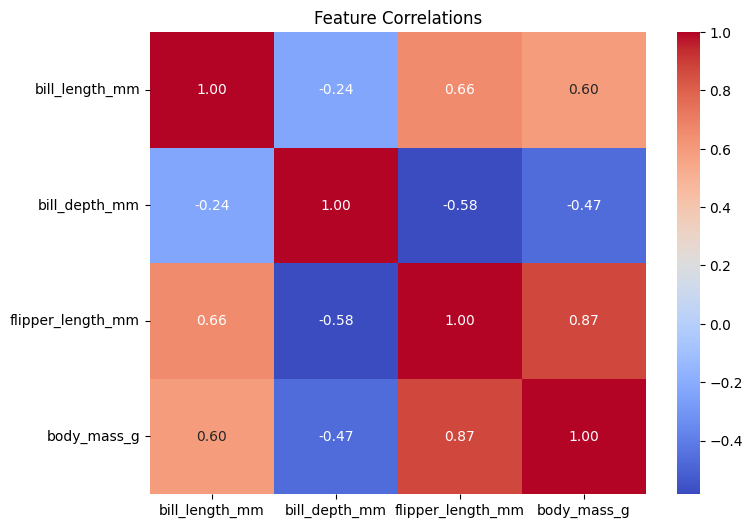

In [6]:
# Select only numerical columns for correlation
subject_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

plt.figure(figsize=(8, 6))
sns.heatmap(df[subject_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()


### **Observations**

**Flipper Length & Body Mass (Correlation: 0.87)**
- **Strong positive correlation**: Penguins with longer flippers tend to have higher body mass.
- **Implication**: Flipper length and body mass might both significantly help differentiate larger penguin species, such as Gentoo.

**Bill Length & Flipper Length (Correlation: 0.66)**
- **Moderate positive correlation**: Penguins with longer bills generally have longer flippers.
- **Implication**: Using both bill length and flipper length together can effectively differentiate certain species.

**Bill Depth & Flipper Length (Correlation: -0.58)**
- **Moderate negative correlation**: Penguins with deeper bills typically have shorter flippers.
- **Implication**: Bill depth and flipper length combined provide complementary information, which is useful for distinguishing between species with differing morphology.

**Bill Depth & Body Mass (Correlation: -0.47)**
- **Moderate negative correlation**: Penguins with deeper bills generally have lower body mass.
- **Implication**: Bill depth and body mass could jointly help in distinguishing smaller species from larger ones.

#### **How do these observations help our project?**

- **Feature Selection Guidance**:  
  Strongly correlated features (e.g., flipper length and body mass) provide powerful predictive information, potentially reducing the number of features needed while maintaining high accuracy.

- **Species Differentiation Insights**:  
  Correlations highlight that certain features are particularly useful for distinguishing among specific species:
  - **Gentoo penguins**: Likely identifiable by their greater body mass and longer flippers.
  - **Adelie and Chinstrap penguins**: Bill depth and flipper length differences are likely helpful.

By understanding feature relationships, we ensure informed decisions during Data Preparation and Modeling phases, directly addressing our research questions:

- **RQ1** (_Can penguin species be accurately classified using the available features?_) → Yes, given strong correlations and distinct patterns.
- **RQ2** (_Which features provide the strongest basis for distinguishing between penguin species?_) → Flipper length, body mass, and bill dimensions emerge as the most significant differentiators.

---


### **2.3.4 Pairplot**

#### **Why Use a Pairplot?**
A pairplot is an extended version of scatter plots for all numerical features. A pairplot helps us explore how numerical features are related and how well they separate penguin species. This visualization is crucial because:

- It shows relationships between numerical features.
- It highlights feature importance for classification.
- It reveals whether species are clearly separable or overlapping.
- It identifies outliers that could impact our model.
- So it helps address our research questions explicitly (RQ1 and RQ2).

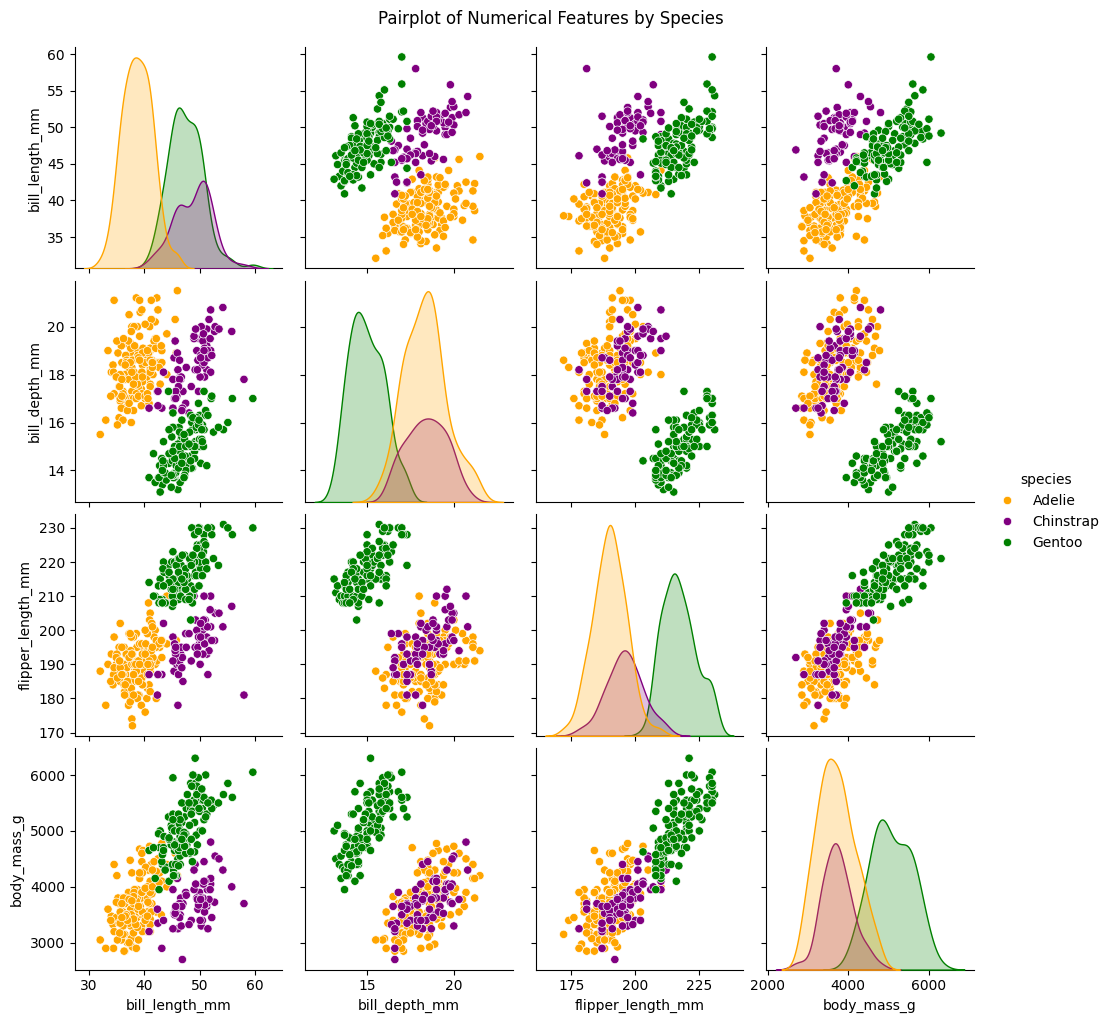

In [7]:
# Define custom colors for species
custom_palette = {"Chinstrap": "purple", "Gentoo": "green", "Adelie": "orange"}

# Create pairplot
sns.pairplot(df, hue="species", palette=custom_palette)
plt.suptitle("Pairplot of Numerical Features by Species", y=1.02)
plt.show()

### **Observations**

**Flipper Length vs. Body Mass**
- Gentoo penguins have significantly longer flippers and higher body mass.
- Chinstrap and Adelie penguins overlap, making them harder to separate.

**Bill Length vs. Bill Depth**
- Chinstrap penguins generally have longer but narrower bills.
- Adelie penguins typically exhibit shorter, deeper bills.
- Some overlap between Adelie and Chinstrap species exists, indicating the need for additional features (such as island or sex) to achieve clear classification

**Flipper Length vs. Bill Length**
- Gentoo penguins again show clear separation with significantly longer flippers and generally longer bills.
- The overlap between Chinstrap and Adelie penguins suggests these two species are more challenging to classify based solely on these two features.

**KDE Plots (Density Distributions)**
- Gentoo penguins’ distributions (especially flipper length and body mass) are distinct from the other two species.
- Overlapping distributions in bill depth among all species suggest it has limited standalone classification power.
- 
#### **How This Helps Our Project**
It helps to partially answer my research questions:
- **RQ1 (Classification feasibility):**

The clear feature separation for Gentoo penguins indicates accurate classification is achievable, especially using flipper length and body mass.
For Adelie and Chinstrap penguins, classification may require combining multiple features (including categorical ones like island and sex) to achieve accurate results.
- **RQ2 (Important features):**

Flipper Length and Body Mass emerge as the strongest features for clearly identifying Gentoo penguins.
Bill Length and Bill Depth provide complementary, though less definitive, information for distinguishing Adelie and Chinstrap penguins.

---


### **2.3.5 Boxplot & Violin Plot**

In this section, we use boxplots and violin plots to visualize the distributions, variability, and potential outliers of all numerical features across penguin species.

#### **Why Use Boxplots & Violin Plots?**
These visualizations offer unique insights not fully captured by pairplots or heatmaps. Specifically, they allow us to:

- Clearly identify outliers and unusual data points (boxplots).
- Understand the detailed distribution shape, such as multimodal patterns, skewness, and density (violin plots).
- Easily compare feature distributions across species to identify strongly distinguishing features.
- These plots help answer our research questions (RQ1 and RQ2)

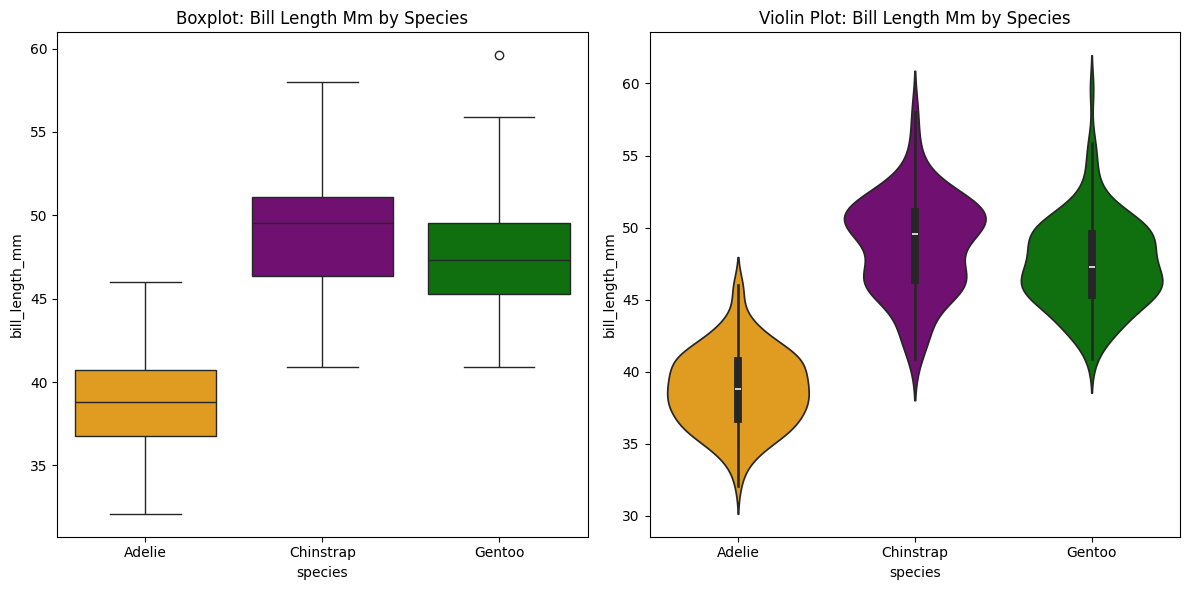

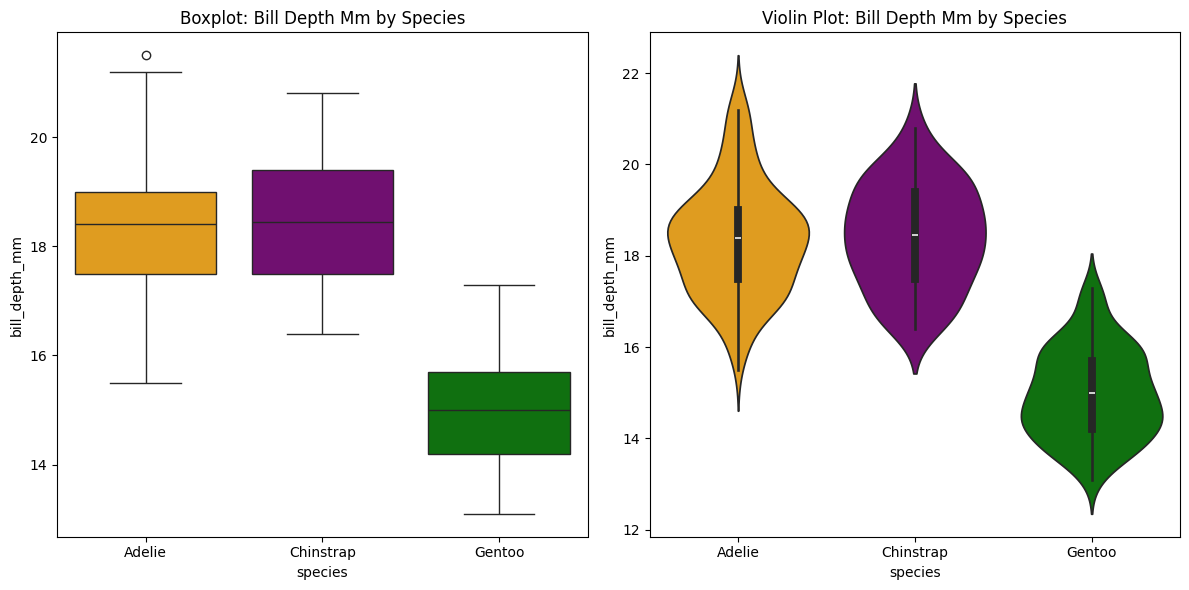

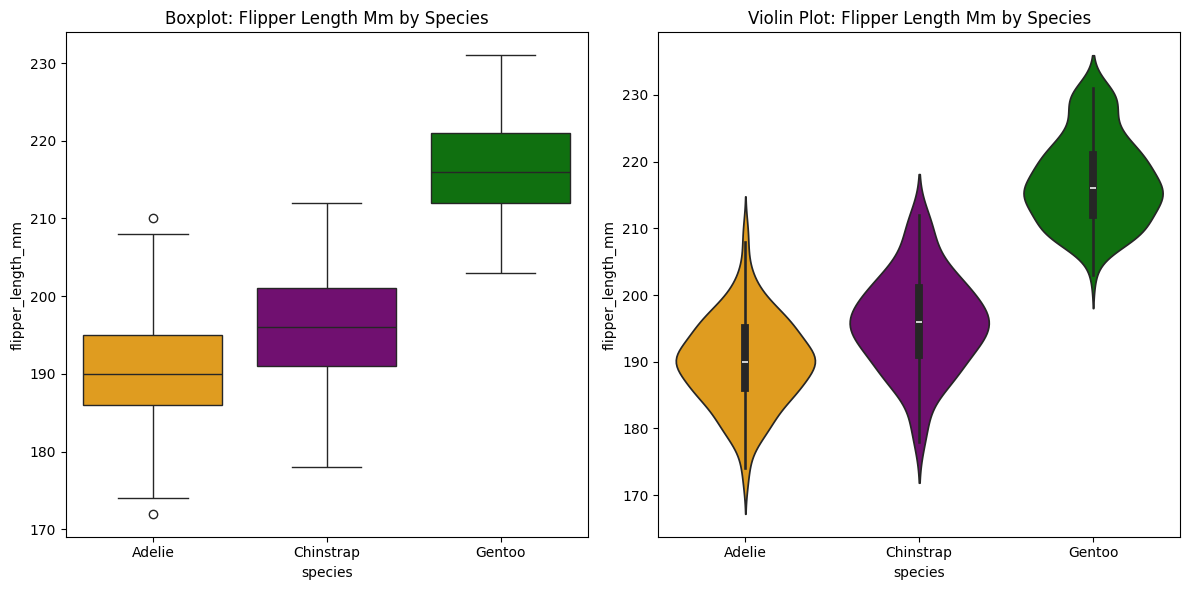

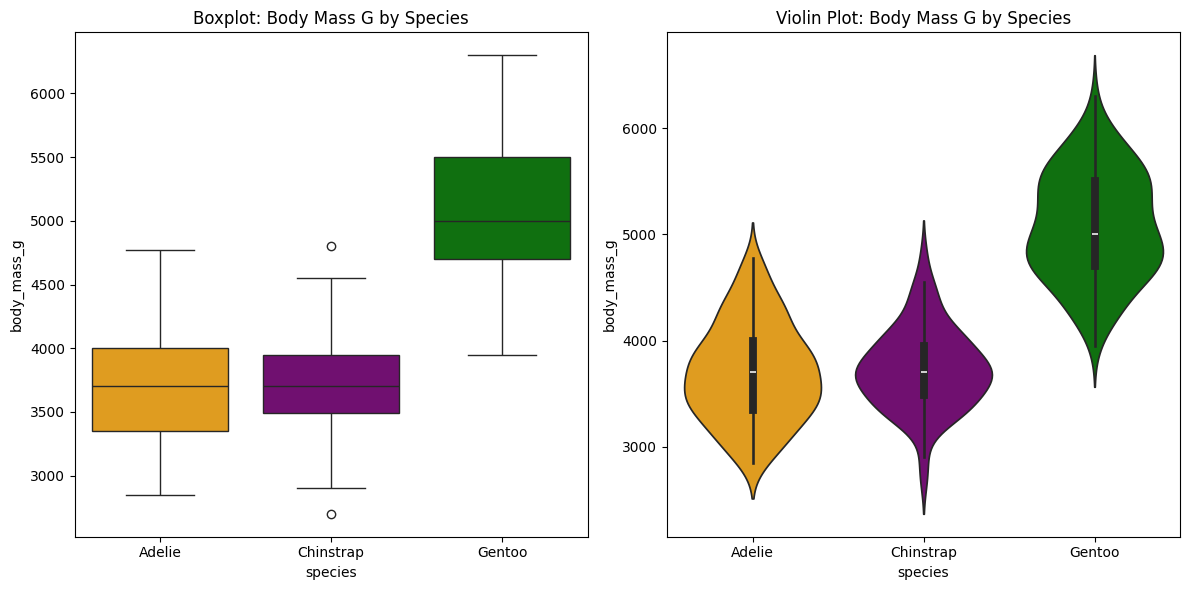

In [8]:
# Define custom colors for species
custom_palette = {"Adelie": "orange", "Chinstrap": "purple", "Gentoo": "green"}
numerical_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x="species", y=feature, data=df, hue="species", palette=custom_palette)
    plt.title(f"Boxplot: {feature.replace('_', ' ').title()} by Species")

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x="species", y=feature, data=df, hue="species", palette=custom_palette)
    plt.title(f"Violin Plot: {feature.replace('_', ' ').title()} by Species")

    plt.tight_layout()
    plt.show()


### **Observations**

**Bill Length**
- Gentoo penguins generally have longer bills, clearly separating them from others.
- Chinstrap and Adelie penguins show some overlap, making bill length alone insufficient for clear classification.
- A few outliers identified.

**Bill Depth**
- There is a clear differentiation between Adelie (deeper bills) and Gentoo (shallower bills).
- Moderate overlap between Adelie and Chinstrap penguins suggests the bill depth alone isn't definitive.
- Outliers appear minimal, indicating consistent data.

**Flipper Length**
- Gentoo penguins have distinctly longer flippers, clearly separated from other species.
- Moderate overlap between Adelie and Chinstrap, suggesting additional features will be needed for these species.
- A few outliers in Adelie penguins identified.

**Body Mass**
- Gentoo penguins show distinctly heavier body mass distributions.
- Adelie and Chinstrap penguins exhibit overlap, suggesting that combining body mass with other features is crucial.
- The presence of a few potential outliers is seen.

---

### <font color="green">**2.4 Data Quality Verification**</font>

In this step, we verify the quality of the dataset by checking for missing values, duplicate entries, and potential outliers. Ensuring data quality is vital to achieving accurate and reliable model predictions.

#### **Why Verify Data Quality?**
- To ensure the accuracy and consistency of the dataset.
- To address our research questions clearly( RQ1 and RQ2).
- To prepare for effective data preprocessing.

### **2.4.1 Missing Values Check**

We start by examining missing values, as missing data could negatively affect model accuracy.

In [67]:
# The missing values in the dataset
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_summary

,Missing Values,Percentage (%)
species,0,0.00
island,0,0.00
bill_length_mm,2,0.58
bill_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58
sex,11,3.20


### **Missing Values Heatmap**
Visualizing missing data to quickly assess and identify patterns:


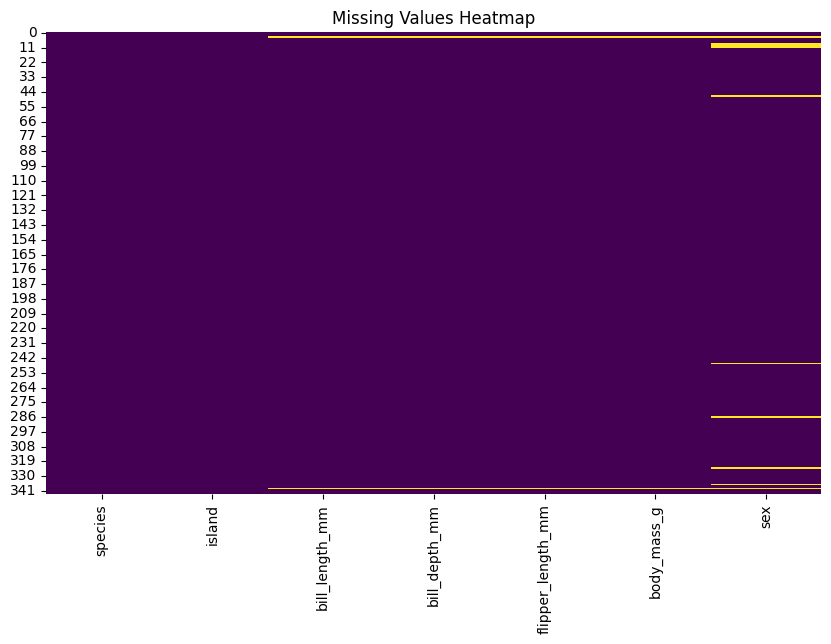

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### **Observations**

Missing values appear randomly distributed, suggesting no systematic missingness that could bias the results.
These missing values will need handling (e.g., imputation or removal) in the Data Preparation step.

### **2.4.2 Duplicate Records Check**

Checking for duplicates helps maintain dataset integrity, ensuring no biased model training.

In [69]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0
